# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [11]:
def apply_svd_custom(X_train, X_test, n_components):
    X_mean = np.mean(X_train, axis=0)
    X_centered = X_train - X_mean

    covariance_matrix = np.cov(X_centered, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    top_eigenvectors = sorted_eigenvectors[:, :n_components]

    X_train_svd = (X_train - X_mean) @ top_eigenvectors
    X_test_svd = (X_test - X_mean) @ top_eigenvectors

    return X_train_svd, X_test_svd, top_eigenvectors

## Part 3: Train Logistic Regression and Measure Performance

In [12]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42)

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [13]:
svd_components = [10, 28, 41, 68, 99, 113, 141]  # Try different numbers of components to experiment

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd, top_eigenvectors = apply_svd_custom(X_train, X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    # Append the results for analysis, including the top_eigenvectors
    results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time,
        'top_eigenvectors': top_eigenvectors  # Include top eigenvectors
    })

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 10 components...
SVD components: 10, Accuracy: 0.8035, Training time: 1.2522 seconds
Applying custom SVD with 28 components...
SVD components: 28, Accuracy: 0.8902, Training time: 7.0175 seconds
Applying custom SVD with 41 components...
SVD components: 41, Accuracy: 0.9044, Training time: 8.6716 seconds
Applying custom SVD with 68 components...
SVD components: 68, Accuracy: 0.9138, Training time: 18.2628 seconds
Applying custom SVD with 99 components...
SVD components: 99, Accuracy: 0.9179, Training time: 45.8260 seconds
Applying custom SVD with 113 components...
SVD components: 113, Accuracy: 0.9184, Training time: 54.9027 seconds
Applying custom SVD with 141 components...
SVD components: 141, Accuracy: 0.9204, Training time: 64.9240 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


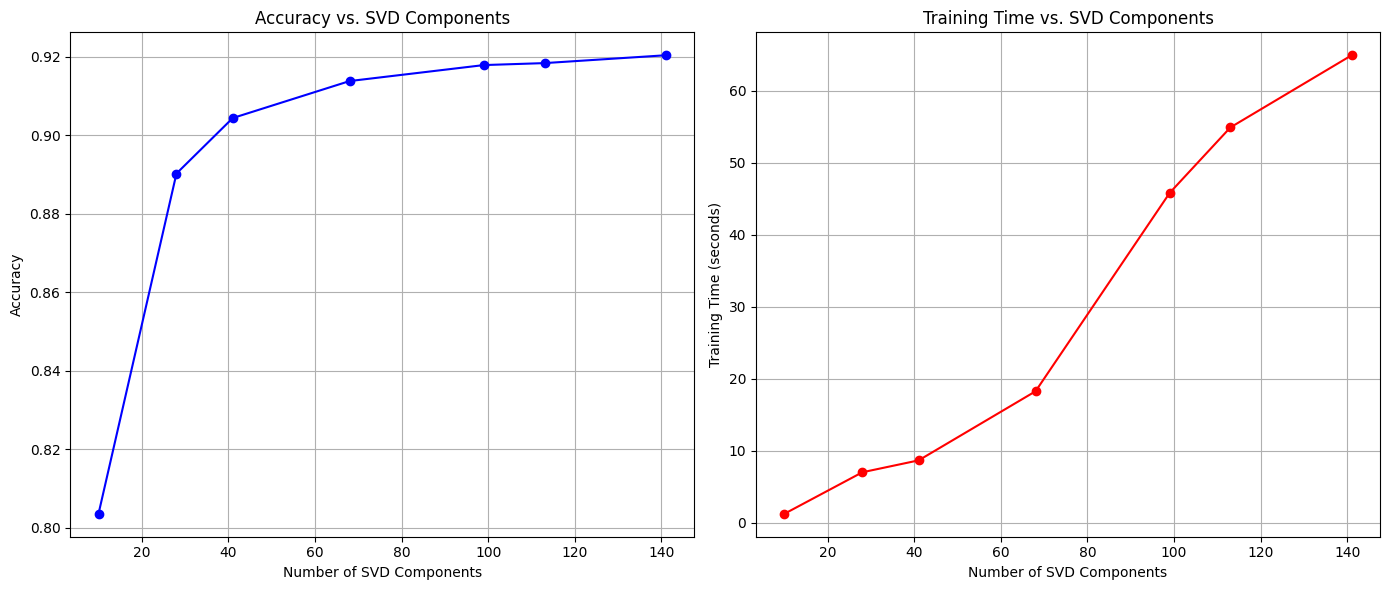

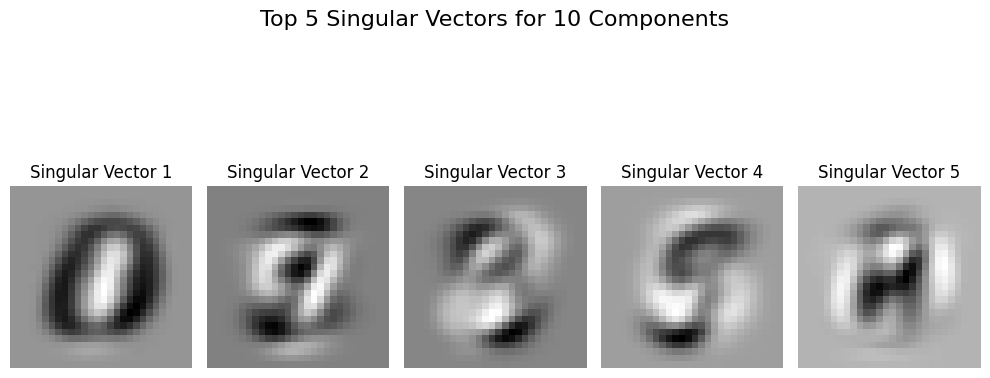

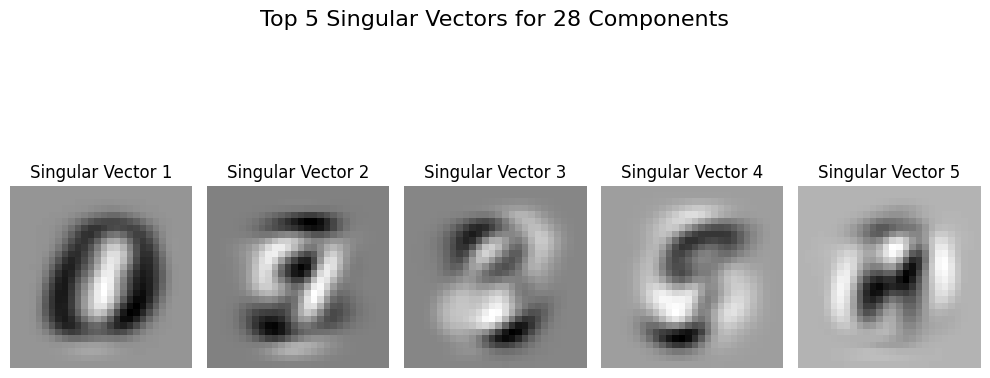

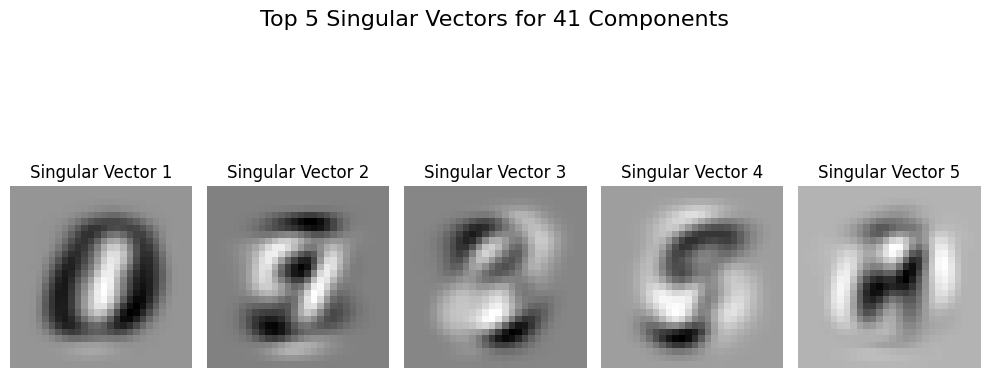

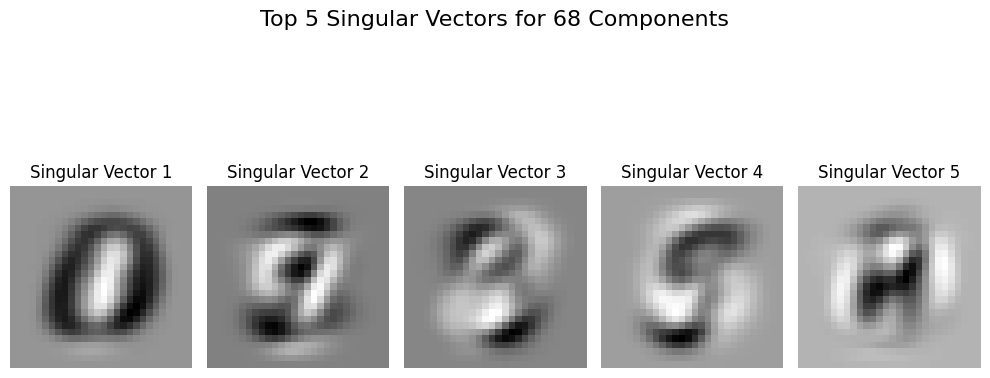

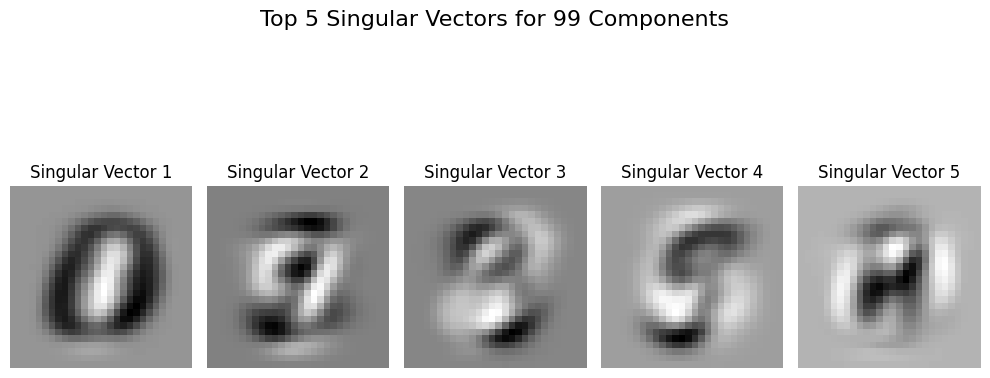

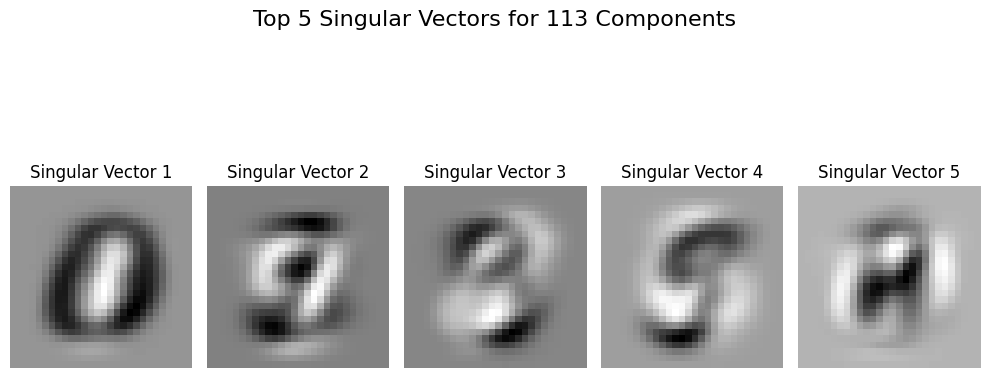

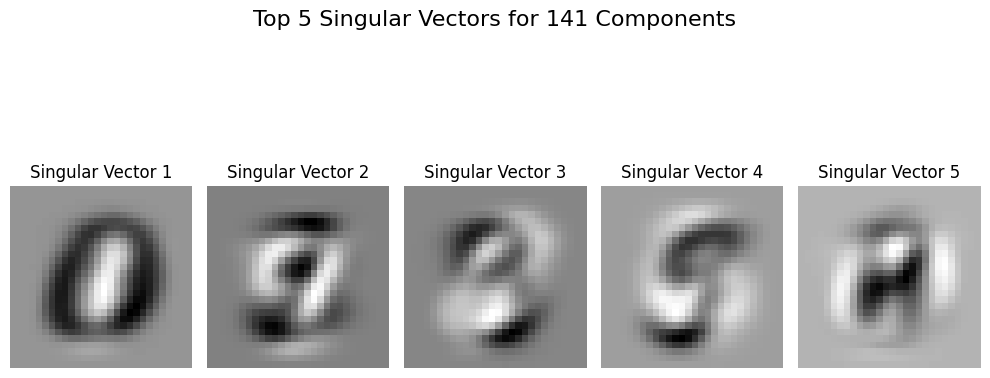

In [14]:
components = [res['n_components'] for res in results]
accuracies = [res['accuracy'] for res in results]
training_times = [res['training_time'] for res in results]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. SVD Components')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(components, training_times, marker='o', linestyle='-', color='red')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs. SVD Components')
plt.grid(True)

plt.tight_layout()
plt.show()

top_vectors_count = 5

for n_components in svd_components:
    selected_components_row = next((res for res in results if res['n_components'] == n_components), None)
    if selected_components_row:
        top_eigenvectors = selected_components_row.get('top_eigenvectors')

        singular_vectors_reshaped = top_eigenvectors[:, :top_vectors_count].T.reshape(top_vectors_count, 28, 28)

        plt.figure(figsize=(10, 5))
        plt.suptitle(f'Top 5 Singular Vectors for {n_components} Components', fontsize=16)
        for i in range(top_vectors_count):
            plt.subplot(1, top_vectors_count, i + 1)
            plt.imshow(singular_vectors_reshaped[i], cmap='gray')
            plt.title(f'Singular Vector {i + 1}')
            plt.axis('off')

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

## Part 6: Analyze / Conclusion

YOUR ANSWER:

In this assignment, we successfully applied Singular Value Decomposition (SVD) as a dimensionality reduction technique on the MNIST dataset and trained a logistic regression classifier on both the original and reduced data. By experimenting with varying numbers of SVD components, we observed how reducing dimensionality affected model performance, particularly in terms of training time and accuracy. The results showed that as we reduced the number of components, the training time decreased, while the accuracy of the model remained relatively high with a sufficient number of components. Visualizing the top singular vectors provided insight into the patterns captured in the data. Overall, SVD proved to be an effective method for balancing computational efficiency and model performance.